# IMPORTING LIBRARIES

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
from sqlalchemy import *
import mysql.connector
from pandas.io import sql
import timeit
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
warnings.filterwarnings('ignore')

## IMPORTING FUNCTIONS FROM MyFunctions_FinalProject

In [8]:
from MyFunction_FinalProject import initial_cleaning,save_to_sqlite,initial_cleaning,save_to_Mysql,save_to_Mariadb,MSQL_con,Mariadb_con,TimeOfExecutionRecording,Dataset_preparation_for_LR_state1,Dataset_preparation_for_LR_stage2,Dataset_preparation_for_LR_stage3_Mapping

# PRELIMINARY DATA EXPLORATION

In [150]:
def bargraph_(df,xd,yd,x_label,y_label,title):
    matplotlib.rcParams['figure.figsize']=(8,8)
    ax=sns.barplot(x=xd,y=yd,data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis="x", rotation=90)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [151]:
def scatterplotgraph_(xd,yd,x_label,y_label,title,d):
    plt.figure(10,figsize=(6,4))
    ax=sns.scatterplot(xd,yd)
    if d==0:
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
    ax.tick_params(axis="x", rotation=45)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    ax.plot()
    plt.show()

In [152]:
dayoneMessages_df=pd.read_excel('DayOnestationmessages.xlsx') 
dayonedaily2_df=pd.read_excel('DAYONEDaily2.xlsx')

In [153]:
dayoneMessages_df.head(7)

,Day One station messages,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Tue 31 May 2022 10:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Day One Reasons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Full Parameters: See Appendix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D1 Journey Date,D1 Location,D1 Hcode,D1 Planned Activity,D1 Working Time,D1 Working Var,Increased Lateness,Jny Log Message Date,Jny Log Message Title,Jny Log Message Data Label,Jny Log Message Data Value
5,2022-05-30 00:00:00,ASHFORDI,895R6810,O,00:14:00,269.0,269.0,30/05/2022 00:18:55,5R68 : ASHFORDI : Origin : Late departure,Lateness (sec),269
6,2022-05-30 00:00:00,ASHFORDI,895R6810,O,00:14:00,269.0,269.0,30/05/2022 01:03:41,5R68 : ASHFORDI : Station Delay Reason (Origin),Actual Departure Time,30/05/2022 00:18:29


In [154]:
dayonedaily2_df.head(7)

,DAYONE Daily 2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Tue 31 May 2022 10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,trains by location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Full Parameters: See Appendix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D1 Journey Date,D1 Hcode,D1 Train,Public Start Time,D1 Origin,D1 Dest,Public End Time,D1 Jny Tsdb Profit Centr,D1 Location,D1 Planned Activity,...,D1 Working Time,Increased Lateness,D1 Public Var,D1 Working Var,Actual Duration,D1 Actual Time,Actual Time Source,Actual Time Secondary Source,Actual Duration (Trust),Actual Time (Trust)
5,2022-05-30 00:00:00,882Y8610,2Y86,00:10:00,CHARING X,ASHFORDI,01:25:00,24605004,CHARING X,O,...,00:10:00,NaN,-18.0,-18.0,NaN,00:09:42,TD,X2,NaN,00:09:00
6,2022-05-30 00:00:00,882Y8610,2Y86,00:10:00,CHARING X,ASHFORDI,01:25:00,24605004,WATERLOOE,A,...,00:12:30,15.0,-15.0,15.0,183.0,00:12:45,TD,X2,180.0,00:12:00


In [155]:
dayoneMessages_df=initial_cleaning(dayoneMessages_df)
dayonedaily2_df=initial_cleaning(dayonedaily2_df)

In [156]:
dayoneMessages_df.head(5)

,D1_Journey_Date,D1_Location,D1_Hcode,D1_Planned_Activity,D1_Working_Time,D1_Working_Var,Increased_Lateness,Jny_Log_Message_Date,Jny_Log_Message_Title,Jny_Log_Message_Data_Label,Jny_Log_Message_Data_Value
0,2022-05-30 00:00:00,ASHFORDI,895R6810,O,00:14:00,269.0,269.0,30/05/2022 00:18:55,5R68 : ASHFORDI : Origin : Late departure,Lateness (sec),269
1,2022-05-30 00:00:00,ASHFORDI,895R6810,O,00:14:00,269.0,269.0,30/05/2022 01:03:41,5R68 : ASHFORDI : Station Delay Reason (Origin),Actual Departure Time,30/05/2022 00:18:29
2,2022-05-30 00:00:00,ASHFORDI,895R6810,O,00:14:00,269.0,269.0,30/05/2022 01:03:41,5R68 : ASHFORDI : Station Delay Reason (Origin),Comments,wtg signal with indicator
3,2022-05-30 00:00:00,ASHFORDI,895R6810,O,00:14:00,269.0,269.0,30/05/2022 01:03:41,5R68 : ASHFORDI : Station Delay Reason (Origin),Delay Cause,Signal - Stopped or Waiting Proceed aspect - R...
4,2022-05-30 00:00:00,ASHFORDI,891J09M5,D,06:35:00,732.0,609.0,30/05/2022 07:31:23,1J09 : ASHFORDI : Station Delay Reason (Depart...,Actual Arrival Time,30/05/2022 06:35:33


In [157]:
dayonedaily2_df.head(5)

,D1_Journey_Date,D1_Hcode,D1_Train,Public_Start_Time,D1_Origin,D1_Dest,Public_End_Time,D1_Jny_Tsdb_Profit_Centr,D1_Location,D1_Planned_Activity,...,D1_Working_Time,Increased_Lateness,D1_Public_Var,D1_Working_Var,Actual_Duration,D1_Actual_Time,Actual_Time_Source,Actual_Time_Secondary_Source,Actual_Duration_(Trust),Actual_Time_(Trust)
0,2022-05-30 00:00:00,882Y8610,2Y86,00:10:00,CHARING X,ASHFORDI,01:25:00,24605004,CHARING X,O,...,00:10:00,NaN,-18.0,-18.0,NaN,00:09:42,TD,X2,NaN,00:09:00
1,2022-05-30 00:00:00,882Y8610,2Y86,00:10:00,CHARING X,ASHFORDI,01:25:00,24605004,WATERLOOE,A,...,00:12:30,15.0,-15.0,15.0,183.0,00:12:45,TD,X2,180.0,00:12:00
2,2022-05-30 00:00:00,882Y8610,2Y86,00:10:00,CHARING X,ASHFORDI,01:25:00,24605004,WATERLOOE,D,...,00:13:30,NaN,36.0,6.0,51.0,00:13:36,TD,X2,60.0,00:13:00
3,2022-05-30 00:00:00,882Y8610,2Y86,00:10:00,CHARING X,ASHFORDI,01:25:00,24605004,EWER ST J,P,...,00:15:00,NaN,NaN,0.0,84.0,00:15:00,TD,X2,NaN,NaN
4,2022-05-30 00:00:00,882Y8610,2Y86,00:10:00,CHARING X,ASHFORDI,01:25:00,24605004,LONDONBDG,A,...,00:17:00,9.0,22.0,22.0,114.0,00:17:22,TD,X2,NaN,00:17:00


## Analysis 1

In [158]:
        #drop duplicate value by keeping first row by giving execption to d1_hcode
dayonemessage=dayoneMessages_df[['D1_Location','D1_Hcode','D1_Planned_Activity','D1_Working_Time','D1_Working_Var']].drop_duplicates(subset='D1_Hcode',keep='first')
dayonemessage['D1_Working_Time']=pd.to_datetime(dayonemessage['D1_Working_Time'],format= '%H:%M:%S')


        #groupby on dayonedaily dataset to find location with time variance
dayonedaily_timevariance=dayonedaily2_df.groupby(['D1_Location','D1_Working_Var']).size().reset_index().rename(columns={0:'Increased_Lateness Count'}).sort_values('D1_Working_Var')
       

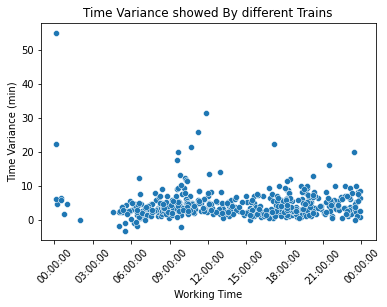

In [159]:
scatterplotgraph_(dayonemessage['D1_Working_Time'],dayonemessage['D1_Working_Var']/60,"Working Time","Time Variance (min)","Time Variance showed By different Trains",0)

## observations
* most of the timvariance occured between 6am to 12 am 
* average time variance is of 1 min to 10 min
* highest time variance showed is around 1 hr

In [161]:
dayone_station_MeanTimevariance=dayonedaily2_df[['D1_Location','D1_Working_Var']].groupby(['D1_Location']).mean().sort_values('D1_Working_Var').tail(5)
dayone_station_MeanTimevariance

,D1_Working_Var
D1_Location,
ROBERTBDG,134.426357
STRAWHLTN,136.043478
WADHRSTLS,136.452055
FRANT,140.095238
BLUEANCHR,273.291874


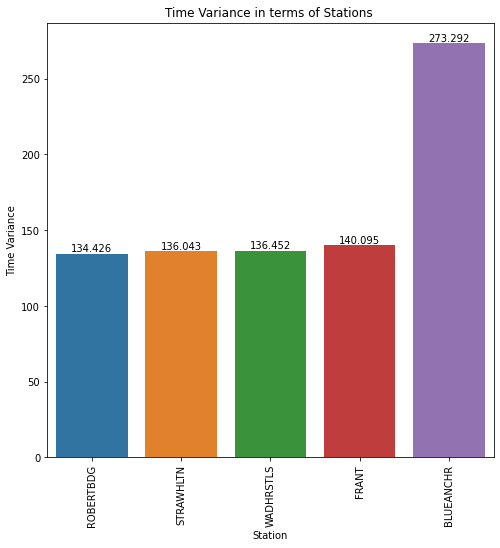

In [166]:
bargraph_(dayone_station_MeanTimevariance,dayone_station_MeanTimevariance.index,'D1_Working_Var','Station','Time Variance','Time Variance in terms of Stations ')

## observations
* most time variance is showed by blueanchr station with an average time variance value of 274 secs

In [ ]:
save_to_sqlite(dayone_station_MeanTimevariance,'dayone_station_MeanTimevariance') # Extracting  data  to sqlite database

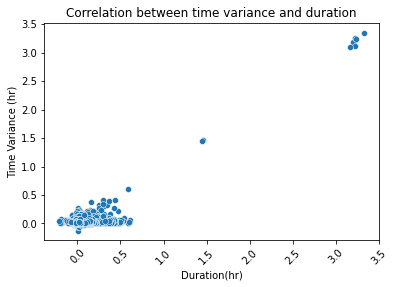

In [82]:
scatterplotgraph_(dayonedaily2_df['D1_Working_Var']/3600,dayonedaily2_df['Actual_Duration']/3600,"Duration(hr)","Time Variance (hr)","Correlation between time variance and duration",1)

## Obsevation 
* time variance and duration shows a slight positive correlation which means with increase in duration time from previous location time variance also increase.

## Station And Train Count 

**Group by according to location and activity to find train count**

In [84]:
TrainCount_Stations=dayonedaily2_df[['D1_Location','D1_Actual_Activity']].groupby(['D1_Location','D1_Actual_Activity']).size().reset_index().rename(columns={0:'Train Count'})

**Group by function to find out the station**

In [85]:
activity_list=['DEPART'] 
TrainCount_Stations=TrainCount_Stations[TrainCount_Stations['D1_Actual_Activity'].isin(activity_list)].sort_values('Train Count') 

**Concatenating top 5 station with max train count and bottom 5 station with least train count**

In [86]:
TrainCount_Stations_top5_bottom5 = pd.concat([TrainCount_Stations[:5],TrainCount_Stations[-5:]])
TrainCount_Stations_top5_bottom5

,D1_Location,D1_Actual_Activity,Train Count
219,FOLKSTN E,DEPART,1
248,HASTINGS,DEPART,1
261,HIGHAM,DEPART,4
137,CROFTONPK,DEPART,4
37,BELLINGHM,DEPART,4
78,BROMLEY S,DEPART,262
267,HITHERGRN,DEPART,320
299,LEWISHAM,DEPART,483
547,WATERLOOE,DEPART,592
308,LONDONBDG,DEPART,992


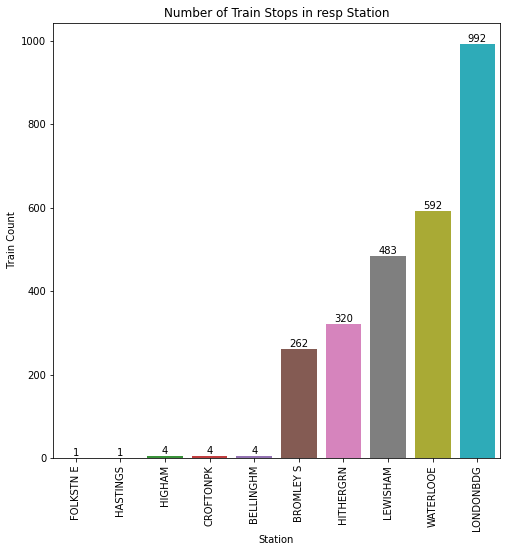

In [87]:
bargraph_(TrainCount_Stations_top5_bottom5 ,TrainCount_Stations_top5_bottom5['D1_Location'] ,TrainCount_Stations_top5_bottom5['Train Count'],'Station',' Train Count','Number of Train Stops in resp Station')

## Observations
* A large number of train stops in london bridge station then comes waterloo.
* Folkstine and hastings is least popular station where only 1 train stops

 ## Extracting  data  to sqlite database

In [64]:
save_to_sqlite(TrainCount_Stations_top5_bottom5,'TrainCount_Stations_top5_bottom5')

   index D1_Location D1_Actual_Activity  Train Count
0    219   FOLKSTN E             DEPART            1
1    248    HASTINGS             DEPART            1
2    261      HIGHAM             DEPART            4
3    137   CROFTONPK             DEPART            4
4     37   BELLINGHM             DEPART            4


# BENCHMARKING OF DATABASES

In [88]:
dayonedaily2_df=pd.read_excel('DAYONEDaily2.xlsx')
dayonedaily2_df=initial_cleaning(dayonedaily2_df)

### Droping unwanted coloumn

In [89]:
dayonedaily2_df=dayonedaily2_df.drop(["D1_Journey_Date","D1_Jny_Tsdb_Profit_Centr","Planned_Platform","Actual_Platform","Line","Dir","Delay_Monitoring_Point","Count_Trains_Booked","Actual_Time_Source","Actual_Time_Secondary_Source","Actual_Duration_(Trust)","Actual_Time_(Trust)"],axis=1)

In [90]:
dayonedaily2_df.dropna(subset=['D1_Actual_Time','D1_Working_Time','D1_Hcode','D1_Location'],inplace=True)

In [91]:
dayonedaily2_df["D1_Actual_Time"]=pd.to_datetime(dayonedaily2_df["D1_Actual_Time"],format='%H:%M:%S').dt.time
dayonedaily2_df["D1_Working_Time"]=pd.to_datetime(dayonedaily2_df["D1_Working_Time"],format='%H:%M:%S').dt.time
dayonedaily2_df.insert(0,'ID',range(1,1+len(dayonedaily2_df)))

## SAVING DATAFRAMES TO DB

In [93]:
save_to_Mysql(dayonedaily2_df,"dayonedaily2_df_updated2")# MYSQL
save_to_Mariadb(dayonedaily2_df,"dayonedaily2_df_updated2") # MARIADB
save_to_sqlite(dayonedaily2_df,"dayonedaily2_df_updated2") # SQLITE

In [98]:
cursor,con_mysql=MSQL_con() # MSQL connection


In [99]:
 # calling storeprocedure 
cursor.execute('CALL BestAndWorst_updated2')

10

## DATA VISUALISATION OF FINDINGS

**Find the top best 10 stations - those having 0 seconds delay or arriving early**

In [100]:
def Retriving_Resultant_set():
    column_names = [col[0] for col in cursor.description] # Get column names from MySQL

    df = []
    for row in cursor.fetchall():
        df.append({name: row[i] for i, name in enumerate(column_names)})
    df1 = pd.DataFrame(df)
    return df1

In [101]:
# Resultant set 1
df_BS=Retriving_Resultant_set() # Best Stations
cursor.nextset()
# Resultant set 2
df_BL=Retriving_Resultant_set() # Best Legs
cursor.nextset()
# Resultant set 3
df_BHC=Retriving_Resultant_set() # Best HCode
cursor.nextset()
# Resultant set 4
df_WS=Retriving_Resultant_set()# Worst Stations
cursor.nextset()
# Resultant set 5
df_WL=Retriving_Resultant_set() # Worst Legs
cursor.nextset()
# Resultant set 6
df_WHC=Retriving_Resultant_set() # Worst Hcode
cursor.nextset()

True

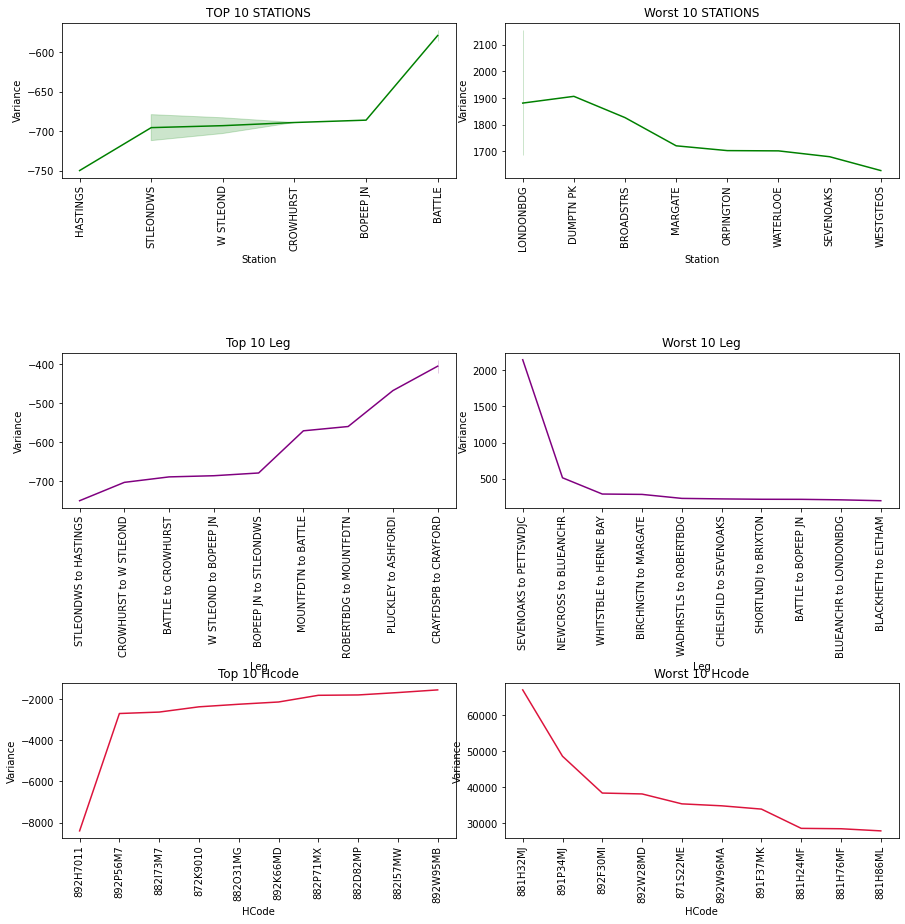

In [102]:
f , axes = plt.subplots(3,2, figsize = (15,15))
ax1=sns.lineplot(x='D1_Location',y='D1_Working_Var',data=df_BS,ax=axes[0,0],color='green')
ax1.tick_params(axis="x", rotation=90)
ax1.set(xlabel="Station",ylabel="Variance",title="TOP 10 STATIONS")


ax2=sns.lineplot(x='D1_Location',y='D1_Working_Var',data=df_WS,ax=axes[0,1],color='green')
ax2.tick_params(axis="x", rotation=90)
ax2.set(xlabel="Station",ylabel="Variance",title="Worst 10 STATIONS")

ax3=sns.lineplot(x='leg',y='D1_Working_Var',data=df_BL,ax=axes[1,0],color='purple')
ax3.tick_params(axis="x", rotation=90)
ax3.set(xlabel="Leg",ylabel="Variance",title="Top 10 Leg")

ax4=sns.lineplot(x='leg',y='m',data=df_WL,ax=axes[1,1],color='purple')
ax4.tick_params(axis="x", rotation=90)
ax4.set(xlabel="Leg",ylabel="Variance",title="Worst 10 Leg")


ax5=sns.lineplot(x='D1_Hcode',y='total_variance_Hcode',data=df_BHC,ax=axes[2,0],color='crimson')
ax5.tick_params(axis="x", rotation=90)
ax5.set(xlabel="HCode",ylabel="Variance",title="Top 10 Hcode")

ax6=sns.lineplot(x='D1_Hcode',y='total_variance_Hcode',data=df_WHC,ax=axes[2,1],color='crimson')
ax6.tick_params(axis="x", rotation=90)
ax6.set(xlabel="HCode",ylabel="Variance",title="Worst 10 Hcode")
f.subplots_adjust(hspace=1.129, wspace=0.125)

### BENCHMARKING DATABASE

### MYSQL

In [135]:
SETUP_CODE = '''
from MyFunction_FinalProject import MSQL_con,Mariadb_con
cursor,con_mysql=MSQL_con() # MSQL connection'''

TEST_CODE1 = '''

cursor.execute("select  D1_Location,D1_Actual_Activity,D1_Working_Var from dayonedaily2_df_updated2 where D1_Working_Var<=0 and D1_Actual_Activity in('ARRIVE' and 'TERMINUS') order by D1_Working_Var asc limit 10")'''

TEST_CODE2 = '''

cursor.execute("select ID,D1_Hcode,D1_Location,D1_Actual_Activity,D1_Working_Var,concat(prevstation,' to ',D1_Location) as leg from leg where D1_Working_Var<=0 and D1_Actual_Activity not in ('DEPART') order by D1_Working_Var asc limit 10 ")'''

TEST_CODE3 = '''

cursor.execute("select  sum(D1_Working_Var) as total_variance_Hcode ,D1_Hcode  from dayonedaily2_df_updated2  group by D1_Hcode order by total_variance_Hcode asc limit 10")'''

TEST_CODE4 = '''

cursor.execute("select  D1_Hcode,D1_Location,D1_Actual_Activity,D1_Working_Var from dayonedaily2_df_updated2 where D1_Actual_Activity ='ARRIVE'or D1_Actual_Activity='TERMINUS' order by D1_Working_Var desc limit 10")'''

TEST_CODE5 = '''

cursor.execute("select floor(avg(D1_Working_Var))  as m,concat(prevstation,' to ',D1_Location) as leg from leg where  D1_Actual_Activity not in ('DEPART','ORIGIN') group by leg order by m desc limit 10")'''



TEST_CODE6 = '''

cursor.execute("select  sum(D1_Working_Var) as total_variance_Hcode ,D1_Hcode  from dayonedaily2_df_updated2  group by D1_Hcode order by total_variance_Hcode desc limit 10")'''



In [136]:
Mysql_Timings=TimeOfExecutionRecording(SETUP_CODE,TEST_CODE1,TEST_CODE2,TEST_CODE3,TEST_CODE4,TEST_CODE5,TEST_CODE6)

In [137]:
Mysql_Timings['Db']='Mysql'

## MARIADB

In [138]:
SETUP_CODE = '''
from MyFunction_FinalProject import Mariadb_con
cursor1=Mariadb_con() '''

In [139]:
TEST_CODE1 = '''

cursor1.execute("select  D1_Location,D1_Actual_Activity,D1_Working_Var from dayonedaily2_df_updated2 where D1_Working_Var<=0 and D1_Actual_Activity in('ARRIVE' and 'TERMINUS') order by D1_Working_Var asc limit 10")'''

TEST_CODE2 = '''

cursor1.execute("select ID,D1_Hcode,D1_Location,D1_Actual_Activity,D1_Working_Var,concat(prevstation,' to ',D1_Location) as leg from leg where D1_Working_Var<=0 and D1_Actual_Activity not in ('DEPART') order by D1_Working_Var asc limit 10 ")'''

TEST_CODE3 = '''

cursor1.execute("select  sum(D1_Working_Var) as total_variance_Hcode ,D1_Hcode  from dayonedaily2_df_updated2  group by D1_Hcode order by total_variance_Hcode asc limit 10")'''

TEST_CODE4 = '''

cursor1.execute("select  D1_Hcode,D1_Location,D1_Actual_Activity,D1_Working_Var from dayonedaily2_df_updated2 where D1_Actual_Activity ='ARRIVE'or D1_Actual_Activity='TERMINUS' order by D1_Working_Var desc limit 10")'''

TEST_CODE5 = '''

cursor1.execute("select floor(avg(D1_Working_Var))  as m,concat(prevstation,' to ',D1_Location) as leg from leg where  D1_Actual_Activity not in ('DEPART','ORIGIN') group by leg order by m desc limit 10")'''



TEST_CODE6 = '''

cursor1.execute("select  sum(D1_Working_Var) as total_variance_Hcode ,D1_Hcode  from dayonedaily2_df_updated2  group by D1_Hcode order by total_variance_Hcode desc limit 10")'''



In [140]:
MariaDB_Timings=TimeOfExecutionRecording(SETUP_CODE,TEST_CODE1,TEST_CODE2,TEST_CODE3,TEST_CODE4,TEST_CODE5,TEST_CODE6)

In [141]:
MariaDB_Timings['Db']='Maria'

In [142]:
SETUP_CODE = '''
from MyFunction_FinalProject import Sqlite_db
cursor2=Sqlite_db() # MSQL connection'''

TEST_CODE1 = '''

cursor2.execute("select * from dayonedaily2_df_updated2  where D1_Working_Var<=0 and D1_Actual_Activity in ('TERMINUS','ARRIVE')order by D1_Working_Var asc limit 10;")'''

TEST_CODE2 = '''

cursor2.execute("select ID,D1_Hcode,D1_Location,D1_Actual_Activity,D1_Working_Var,(prevstation||' to '||D1_Location) as leg from leg where D1_Working_Var<=0 and D1_Actual_Activity not in ('DEPART') order by D1_Working_Var asc limit 10 ;")'''

TEST_CODE3 = '''

cursor2.execute("select  sum(D1_Working_Var) as total_variance_Hcode ,D1_Hcode  from dayonedaily2_df_updated2  group by D1_Hcode order by total_variance_Hcode asc limit 10;")'''

TEST_CODE4 = '''

cursor2.execute("SELECT  D1_Hcode,D1_Location,D1_Actual_Activity,D1_Working_Var from dayonedaily2_df_updated2 where D1_Actual_Activity ='ARRIVE'or D1_Actual_Activity='TERMINUS' order by D1_Working_Var desc limit 10;")'''

TEST_CODE5 = '''

cursor2.execute("select ID,D1_Hcode,D1_Location,D1_Actual_Activity,D1_Working_Var,(prevstation||' to '||D1_Location) as leg from leg where  D1_Actual_Activity not in ('DEPART','ORIGIN') order by D1_Working_Var desc limit 10 ;")'''



TEST_CODE6 = '''

cursor2.execute("select  sum(D1_Working_Var) as total_variance_Hcode ,D1_Hcode  from dayonedaily2_df_updated2  group by D1_Hcode order by total_variance_Hcode desc limit 10;")'''





In [143]:
SQlite_Timings=TimeOfExecutionRecording(SETUP_CODE,TEST_CODE1,TEST_CODE2,TEST_CODE3,TEST_CODE4,TEST_CODE5,TEST_CODE6)

In [144]:
SQlite_Timings['Db']='SQlite'

In [145]:
Timings=pd.concat([Mysql_Timings,MariaDB_Timings,SQlite_Timings])

In [146]:
Timings['Mean']=Timings.mean(axis=1)

## DATA VISUALISATION OF BENCHMARKING OF DATABASE

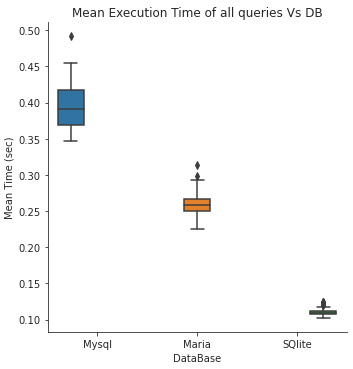

In [168]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Db", "Mean", "Db", data=Timings, kind="box")
    g.set(xlabel="DataBase",ylabel="Mean Time (sec)",title="Mean Execution Time of all queries Vs DB")

# FINDING THE FUTURE DELAY IN THE TRAIN USING FIRST THREE LEGS

## Loading dataset

In [5]:
dayonedaily2_df=pd.read_excel('DAYONEDaily2.xlsx')

## Initial cleaning of dataset

In [10]:
dayonedaily2_df=initial_cleaning(dayonedaily2_df)

## To check the proper distribution of data in the dataset and filter out values

In [11]:
dayonedaily2_df= Dataset_preparation_for_LR_state1(dayonedaily2_df)
dayonedaily2_df

,ID,D1_Hcode,D1_Origin,D1_Dest,D1_Location,D1_Planned_Activity,D1_Working_Var
0,1,882Y8610,CHARING X,ASHFORDI,CHARING X,O,-18.0
1,2,882Y8610,CHARING X,ASHFORDI,WATERLOOE,A,15.0
3,4,882Y8610,CHARING X,ASHFORDI,EWER ST J,P,0.0
4,5,882Y8610,CHARING X,ASHFORDI,LONDONBDG,A,22.0
6,7,882Y8610,CHARING X,ASHFORDI,BLUEANCHR,P,-8.0
...,...,...,...,...,...,...,...
53369,53370,892D77M9,SITTINGBN,SHEERNESS,EASTERNJN,P,59.0
53370,53371,892D77M9,SITTINGBN,SHEERNESS,KEMSLEY,A,37.0
53372,53373,892D77M9,SITTINGBN,SHEERNESS,SWALE,A,21.0
53374,53375,892D77M9,SITTINGBN,SHEERNESS,QUEENBORO,A,45.0


## Making Dataset with Columns D1_Working_Var1,D1_Working_Var2,D1_Working_Var3,D1_Working_Var_Final For Model Training

In [12]:
dayonedaily2_df=Dataset_preparation_for_LR_stage2(dayonedaily2_df)

In [13]:
dayonedaily2_df

,D1_Hcode,D1_Working_Var_1,D1_Working_Var_2,D1_Working_Var_3,D1_Working_Var_Final
0,882Y8610,-18.0,15.0,0.0,90.0
1,892H6610,6.0,-24.0,-38.0,-125.0
2,882L82M0,-8.0,-55.0,-59.0,-182.0
3,882S82M0,-5.0,-10.0,-39.0,80.0
4,882K83M0,-96.0,-62.0,-38.0,-52.0
...,...,...,...,...,...
1522,881V70M9,-1.0,0.0,-16.0,552.0
1523,882A77M9,103.0,95.0,114.0,105.0
1524,882K77M9,480.0,464.0,492.0,426.0
1525,882S83M9,17.0,5.0,22.0,451.0


## DataVisualisation Of Dataframe 

# Grid to show correlation 

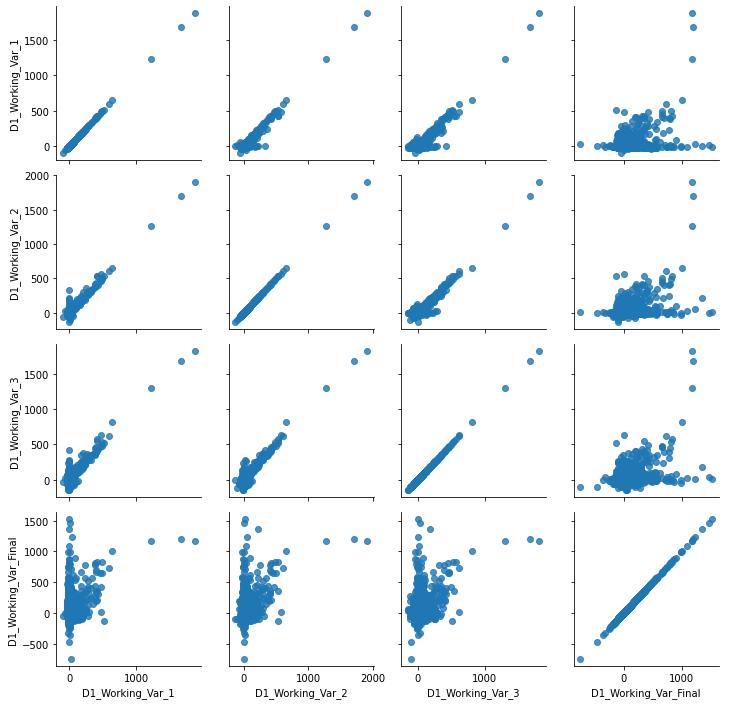

In [22]:
g = sns.PairGrid(dayonedaily2_df, vars=['D1_Working_Var_1', 'D1_Working_Var_2', 'D1_Working_Var_3', 'D1_Working_Var_Final'],
                  palette='RdBu_r')
g.map(plt.scatter, alpha=.8)
g.add_legend();

## Showing Correlation between D1_Working_Var_Final and D1_Working_Var_1

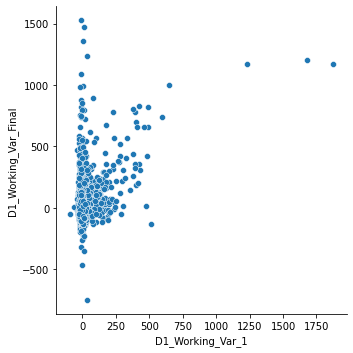

In [15]:
sns.relplot(x='D1_Working_Var_1',y='D1_Working_Var_Final',data=dayonedaily2_df)

## Splitting Into X and Y Dataset for training

In [16]:
X,Y=Dataset_preparation_for_LR_stage3_Mapping(dayonedaily2_df)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=12)

## Training and Testing Model

In [184]:
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

## Mean Square Error and Variance score

In [185]:
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ 1.00000000e+00  6.48859220e-16 -4.41941719e-15]]
Mean squared error: 0.00
Variance score: 1.00


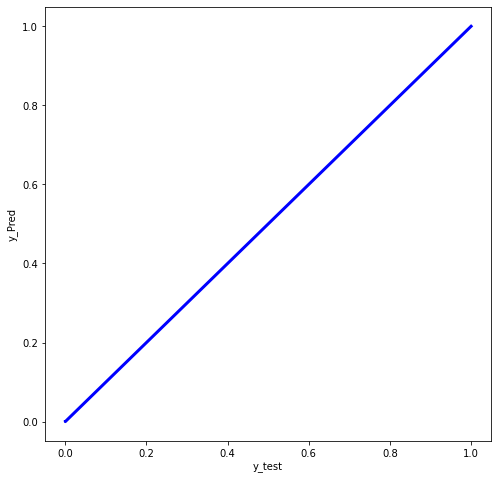

In [186]:
plt.plot(y_test, y_pred, color='blue', linewidth=3)

plt.xlabel("y_test")
plt.ylabel("y_Pred")

plt.show()

In [187]:
def Future_prediction(t):
    res=[]
    for i in range(len(t)):
        if t[i]>0:
            res.append(1)
        else:
            res.append(0) 
    r=lr.predict([res])
    if r==1:
        print("Will be Late")
    else :
        print("Not Late")
    
    return r

## Future Prediction

In [188]:
t=[0,7,8]

t=Future_prediction(t)

Not Late
